-----------------------

### Standard Convolution (with valid padding) Stride=1

![](standard_convolution_valid.gif)

----------------------- 

-----------------------

### Standard Convolution (with same padding) Stride = 1

![](standard_convolution.gif)

----------------------- 

-----------------------

### Same Padding

![Same Padding](same_padding.gif)

-----------------------

-----------------------

### Sobel Kernel Conv

![sobel_kernel_conv](sobel_kernel_conv.png)

-----------------------

-----------------------

### Convolution with Stride=2 and padding=same

![stride2_same_conv](stride2_same_conv.gif)

-----------------------

-----------------------

### Max pooling

![](max_pooling.gif)

-----------------------

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

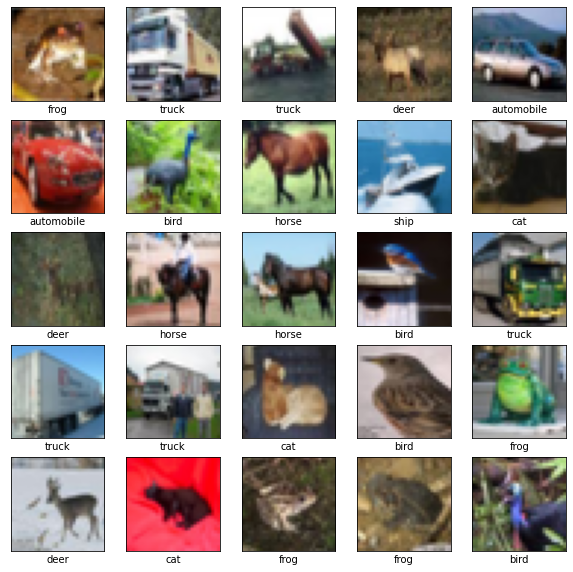

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Padding en conv2D

In [8]:
# Manteniendo la resolución original (padding=same)
model = models.Sequential()
model.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        input_shape=(32, 32, 3),
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),
            padding='valid',
            activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dense(10 , activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
dense_1 (Dense)              (None, 5, 5, 10)          650       
Total params: 56,970
Trainable params: 56,970
Non-trainable params: 0
__________________________________________________

In [7]:

# Sin mantener la resolución original (padding=valid) - Por defecto
model = models.Sequential()
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Padding en MaxPool

In [11]:
# Sin mantener la resolución original (padding=valid) - Por defecto
model = models.Sequential()
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="valid"))
model.add(layers.Conv2D(64, (3, 3), padding="same"))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Same
model = models.Sequential()
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), 
                              padding="valid"))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 2, 2, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### DROPOUT

In [18]:
# Same
model = models.Sequential()
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(3, 3), 
                              padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 64)        